In [3]:
import pandas as pd

data= pd.read_csv("parkinsons - parkinsons.csv")
df=data.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df['status']

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [8]:
df=df.drop(['name'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

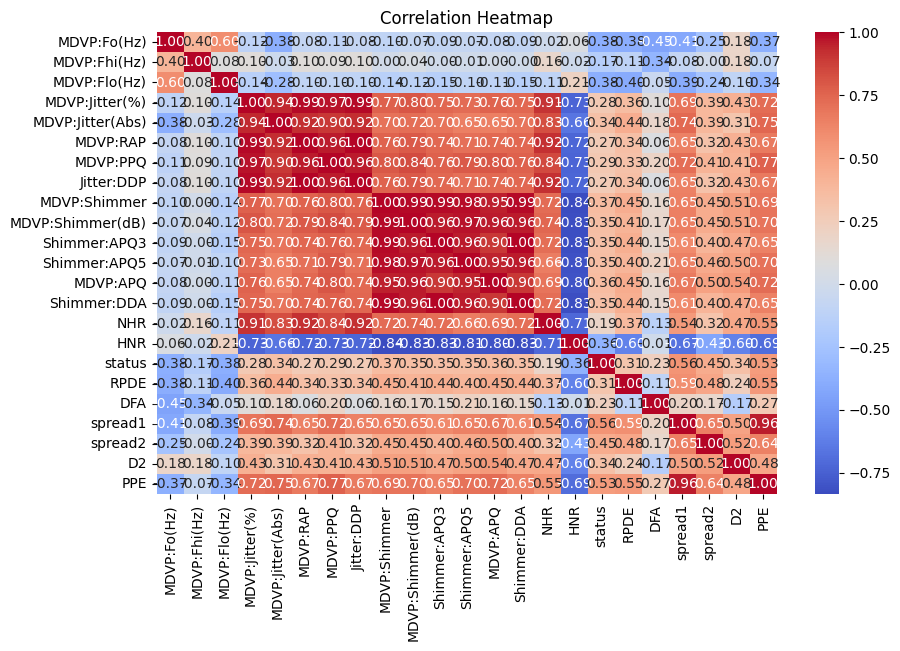

In [10]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



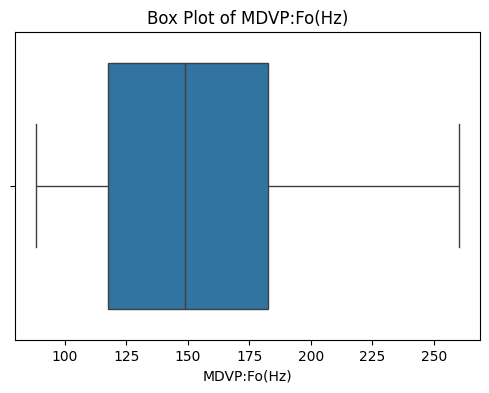

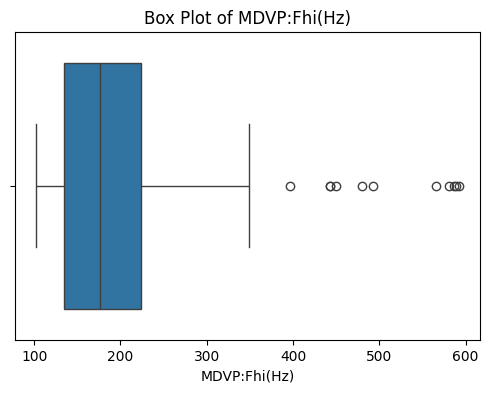

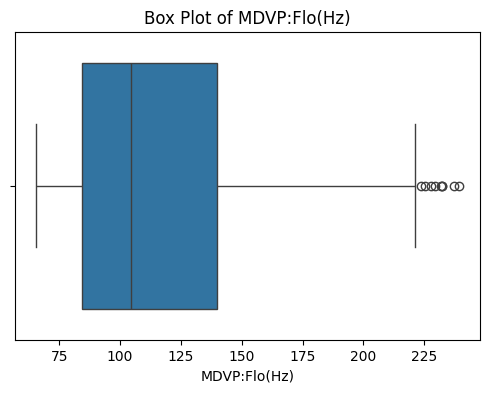

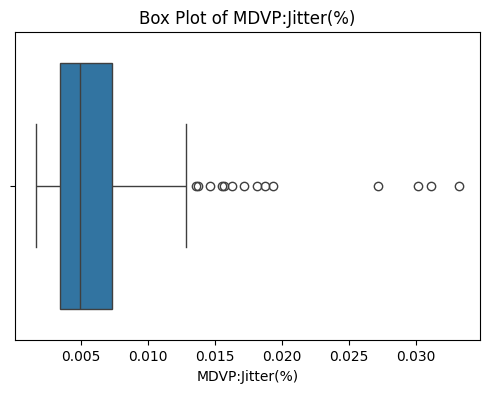

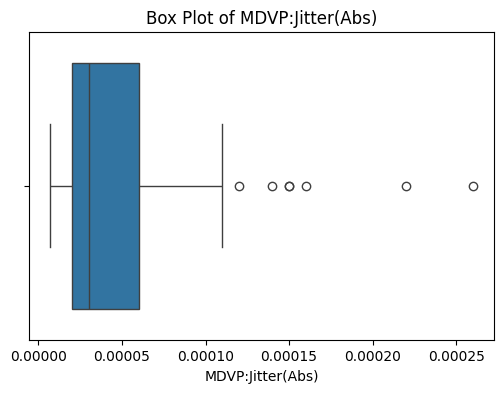

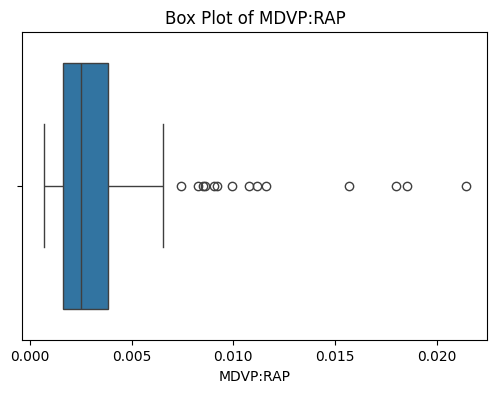

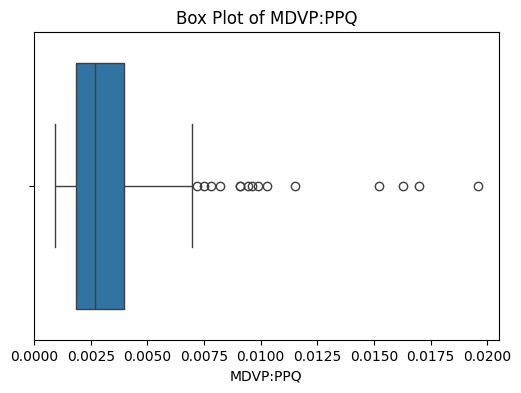

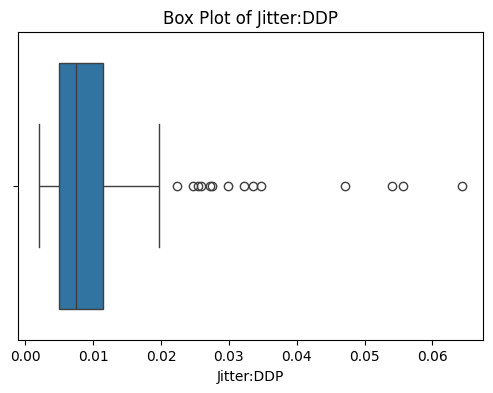

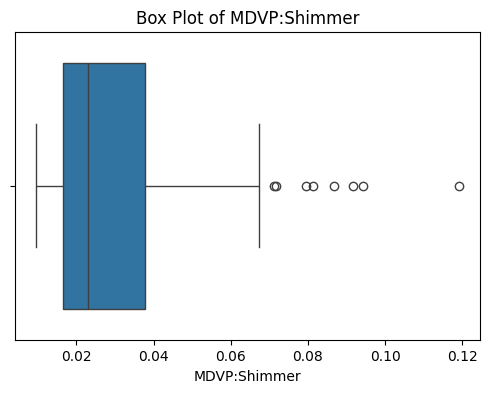

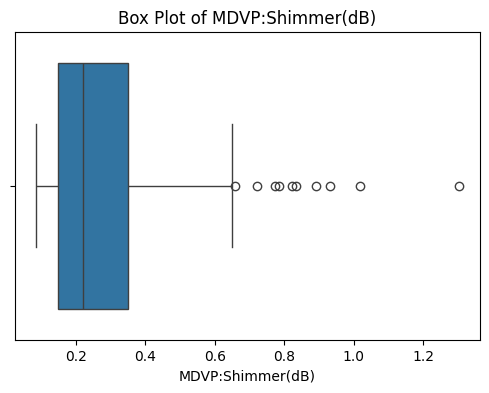

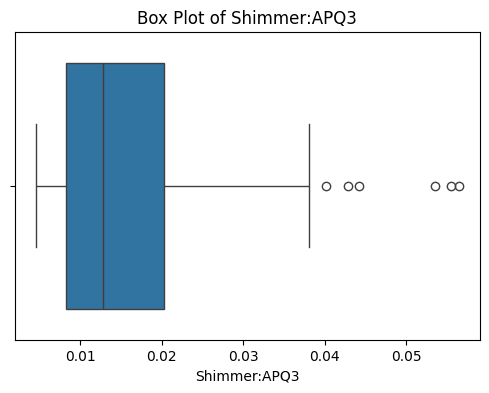

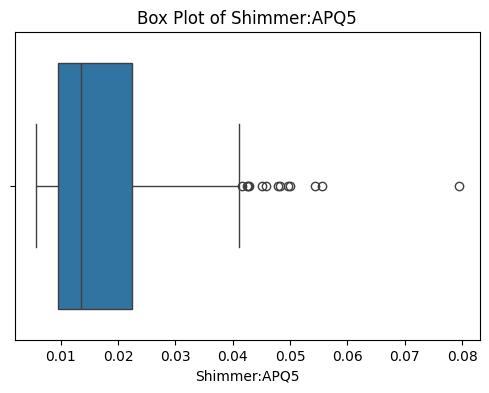

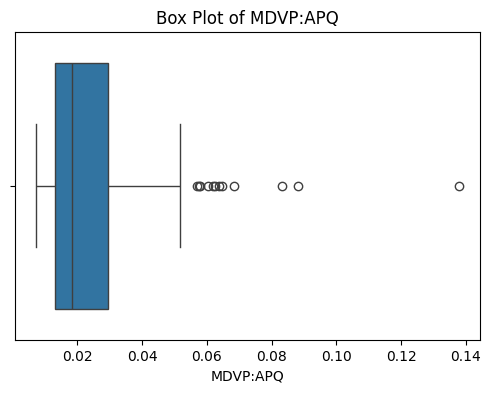

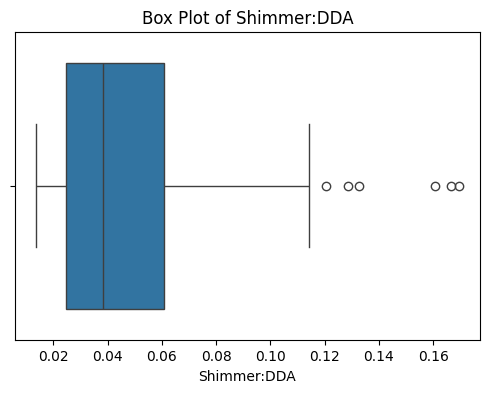

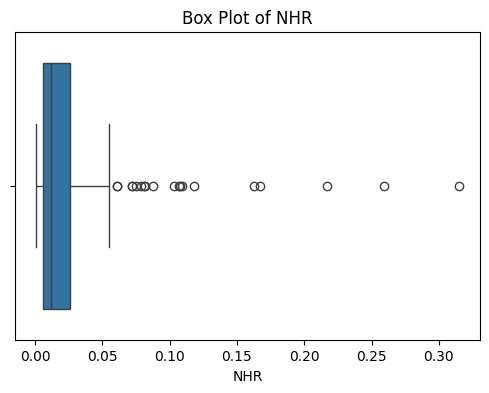

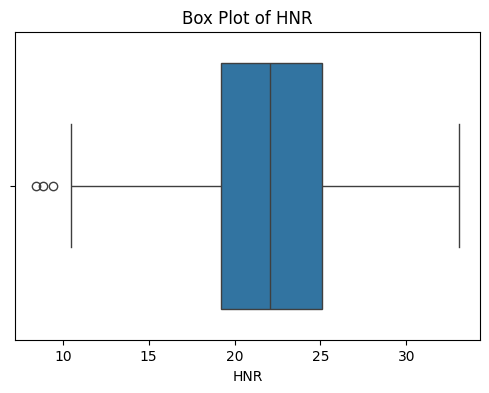

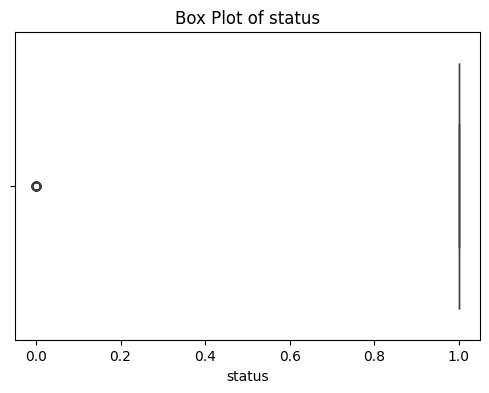

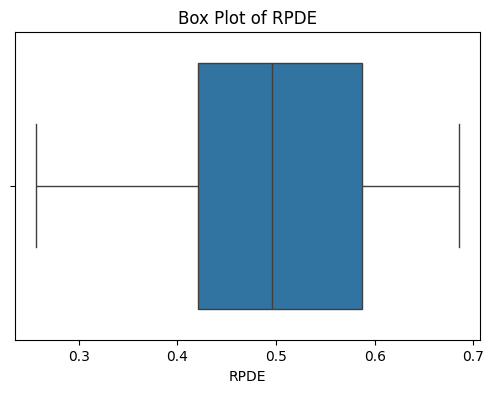

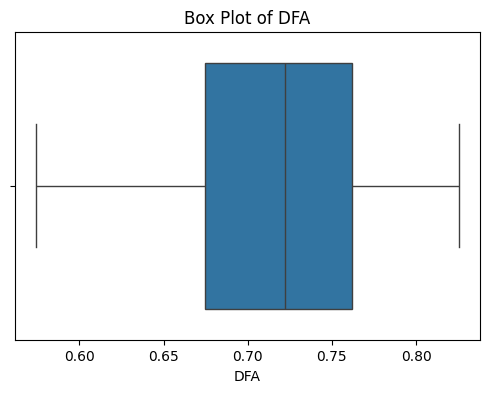

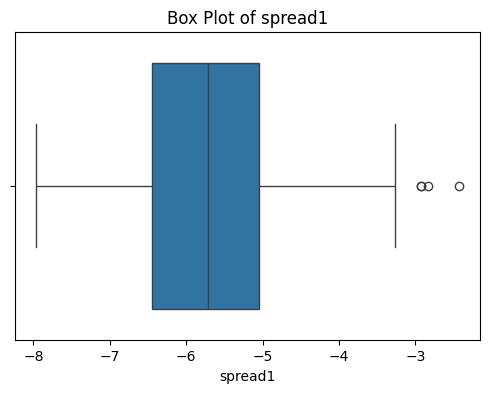

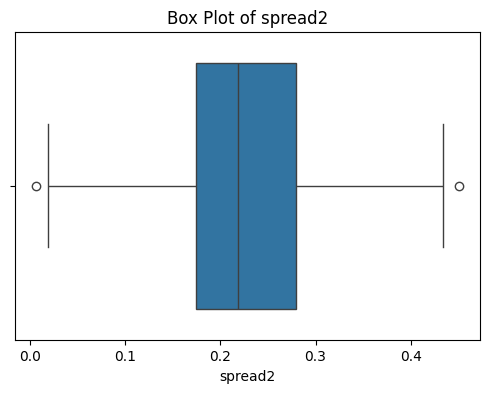

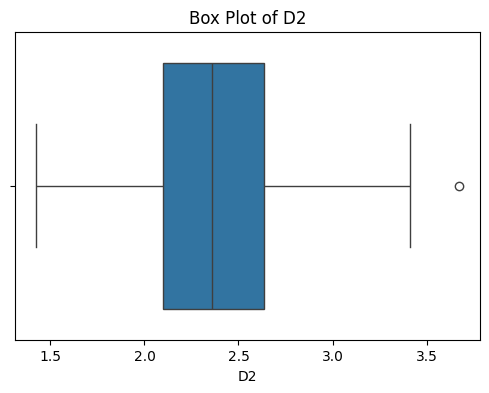

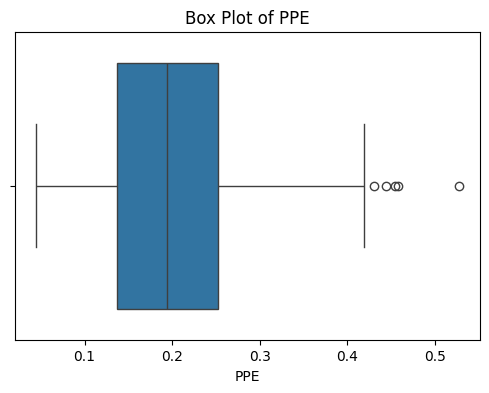

In [11]:
   
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [12]:
x=df.drop(['status'],axis=1)
y=df['status']

In [13]:
x.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
import numpy as np
import pickle


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


class_counts = np.bincount(y.astype(int))
imbalance_ratio = max(class_counts) / min(class_counts)

print("Class counts:", dict(enumerate(class_counts)))
print(f"Imbalance ratio: {imbalance_ratio:.2f}")

if imbalance_ratio > 1.5:
    main_metric = "F1"
    print("Dataset is imbalanced → using F1-score as main metric")
else:
    main_metric = "Accuracy"
    print("Dataset is balanced → using Accuracy as main metric")

# Models to test
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

results = []

trained_models = {}  # Store trained model objects


# Train & evaluate each model
for name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    trained_models[name] = model  # Store the trained model

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(ytest, y_pred),
        "Precision": precision_score(ytest, y_pred, average="weighted"),
        "Recall": recall_score(ytest, y_pred, average="weighted"),
        "F1": f1_score(ytest, y_pred, average="weighted")
    })

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Sort by chosen main metric
df_results = df_results.sort_values(by=main_metric, ascending=False)
print("\n Model Performance Comparison:")
print(df_results)

# Best model
# Best model
best_model_name = df_results.iloc[0]["Model"]
best_model = trained_models[best_model_name]
print(f"\n Best model based on {main_metric}: {best_model_name}")


# Save the best model to a pickle file
with open("best_model_parkinsons.pkl", "wb") as f:
    pickle.dump(best_model, f)
print(f" Best model saved as 'best_model.pkl'")

Class counts: {0: 48, 1: 147}
Imbalance ratio: 3.06
Dataset is imbalanced → using F1-score as main metric

 Model Performance Comparison:
                    Model  Accuracy  Precision    Recall        F1
3  RandomForestClassifier  0.948718   0.951735  0.948718  0.945221
0  DecisionTreeClassifier  0.923077   0.920357  0.923077  0.920710
1      LogisticRegression  0.897436   0.908832  0.897436  0.879940
2    KNeighborsClassifier  0.820513   0.810800  0.820513  0.814990

 Best model based on F1: RandomForestClassifier
 Best model saved as 'best_model.pkl'
